<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Machine-leaning/na_ve_bayes_classification_write_a_python_program_that_reads_the_mobile_price_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Naïve Bayes Classification
Write a Python program that reads the mobile price.csv (provided on LMS) file
into a DataFrame, by doing the given task builds good naïve Bayes models.
1. Load the mobile price.csv dataset into a DataFrame
2. Check the data type of each column and change it according to their data
3. Find missing values and treat them if you found any
4. Plot bar graph for target variable and their categories with help of seaborn
and if data is not balanced then treat them using SMOT.
5. Extract independent variables (Xs) and dependent variables (Ys) into
separate data objects
6. Split data into train and test DataFrame and set test size as 0.2
7. Build Gaussian and Bernoulli models, compare their accuracy 

In [ ]:

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from io import StringIO
import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
df=pd.read_csv("mobile price.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Checking datatypes of columns

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Fnding the missing value.

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Targeting price_range for data distribution

In [ ]:
Target_ratio = df['price_range'].value_counts(normalize=True)
print(Target_ratio)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64


Bar plot for target variable

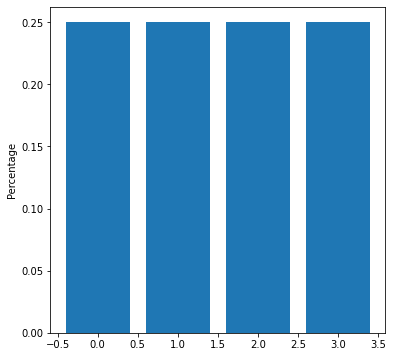

In [ ]:
# checking data for unbalance

plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

 Extract independent variables (Xs) and dependent variables (Ys) into separate data objects


In [ ]:
#training and testing 
x = df.drop("price_range",axis=1)
y = df.price_range

Split data into train and test DataFrame and set test size as 0.2.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

Building Gaussian model

In [ ]:
#model building
#gausian
gaussian_nb=GaussianNB()
gaussian_nb.fit(x_train,y_train)

GaussianNB()

Build Bernoulli model

In [ ]:
#model building
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(x_train,y_train)

BernoulliNB()

Evaluate both model on test data.

In [ ]:
#gaussian accuracy
pred=gaussian_nb.predict(x_test)
acc_gnb=accuracy_score(y_test,pred)
print('Accuracy Score for gaussian: ',acc_gnb)

Accuracy Score for gaussian:  0.835


In [ ]:
#barnulli accuracy
pred=bernoulli_nb.predict(x_test)
acc_bnb=accuracy_score(y_test,pred)
print('Accuracy Score for bernoulli: ',acc_bnb)

Accuracy Score for bernoulli:  0.255


Bar plot for each model score.

<BarContainer object of 2 artists>

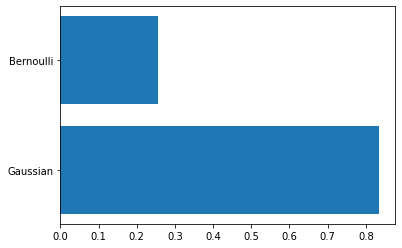

In [ ]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])